# AI Mentions — Exploration
This notebook inspects the output from `scripts/detect_ai_mentions.py` (stored at `Results Datasets/exposures/ai_keyword_matches.json`) and visualizes how AI mentions are distributed over time and by source (ICT vs EDU).

In [26]:
from pathlib import Path
import json
import pandas as pd
import matplotlib.pyplot as plt
# seaborn optional
try:
    import seaborn as sns
    sns.set_context('talk')
except Exception:
    sns = None

ROOT = Path.cwd().parents[0]
MATCH_PATH = ROOT / 'Results Datasets' / 'exposures' / 'ai_keyword_matches.json'
print('Reading', MATCH_PATH)
data = json.loads(MATCH_PATH.read_text(encoding='utf-8'))
len(data)

Reading /Users/miguel/Documents/Master Thesis/Thesis/Results Datasets/exposures/ai_keyword_matches.json


25

In [27]:
# Flatten year → ad → matches into a tabular frame
rows = []
for year, ads in data.items():
    for ad_id, matches in ads.items():
        for m in matches:
            rows.append({
                'year': int(year),
                'ad_id': ad_id,
                'folder': m.get('folder'),
                'keyword': m.get('keyword'),
                'text': m.get('text', '')
            })
df = pd.DataFrame(rows)
df.sort_values(by='year')

,year,ad_id,folder,keyword,text
624,1992,sjmm_suf-1-01-1992-03-02102-0-000000097,edu,ki,kirchenmusikalischem
623,1992,sjmm_suf-1-01-1992-03-02102-0-000000097,edu,ki,Erfahrung auf kirchenmusikalischem und allgeme...
621,1992,sjmm_suf-1-01-1992-03-03108-0-000000001,edu,ai,guten Kenntnissen der Ostschweizer Verhältniss...
622,1992,sjmm_suf-1-01-1992-03-03108-0-000000001,edu,ai,AI
0,1995,sjmm_suf-1-01-1995-03-05203-0-000000016,ict,dialogsystem,Dialogsystem
...,...,...,...,...,...
539,2024,sjmm_suf-2-05-2024-03-05722-1-000365579,ict,ai,AI
540,2024,sjmm_suf-2-05-2024-03-05722-1-000365579,ict,ai,AI-Technologien
541,2024,sjmm_suf-2-05-2024-03-05722-1-000365579,ict,ai,AI-Initiativen
535,2024,sjmm_suf-2-05-2024-03-05722-1-000365579,ict,ai,AI


In [28]:
df['keyword'].value_counts()

keyword
ai                             87
ki                             80
robotik                        73
machine learning               56
data mining                    35
bildverarbeitung               34
robotics                       26
spracherkennung                22
artificial intelligence        19
künstliche intelligenz         18
ml                             14
advanced analytics             14
jax                            12
nlp                            11
deep learning                  10
tensorflow                     10
maschinelles lernen            10
predictive analytics            7
keras                           6
natural language processing     6
predictive maintenance          6
airflow                         6
mlops                           6
ray                             4
svm                             4
computer vision                 3
mdp                             3
spacy                           3
scikit-learn                    3
algori

In [29]:
# Basic overview
total_ads_with_matches = df['ad_id'].nunique()
total_mentions = len(df)
unique_keywords = df['keyword'].nunique()
print(f'Ads with ≥1 match: {total_ads_with_matches:,}')
print(f'Total keyword mentions: {total_mentions:,}')
print(f'Unique keywords matched: {unique_keywords}')
print(df['folder'].value_counts())


Ads with ≥1 match: 221
Total keyword mentions: 630
Unique keywords matched: 52
folder
edu    318
ict    312
Name: count, dtype: int64


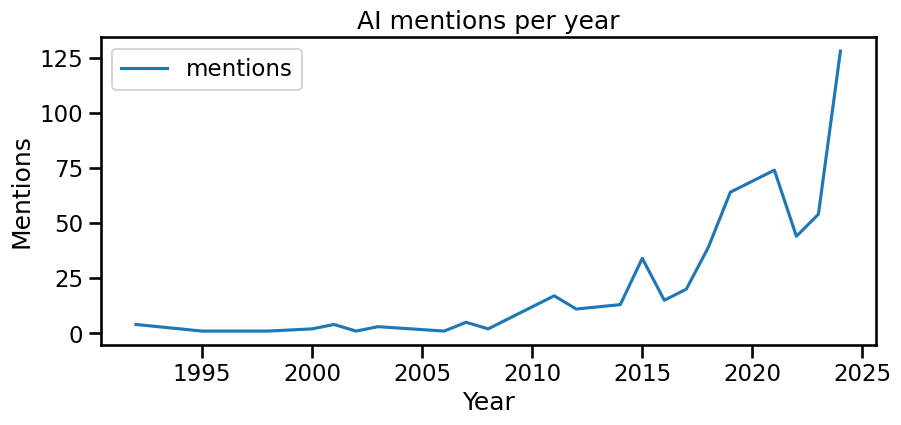

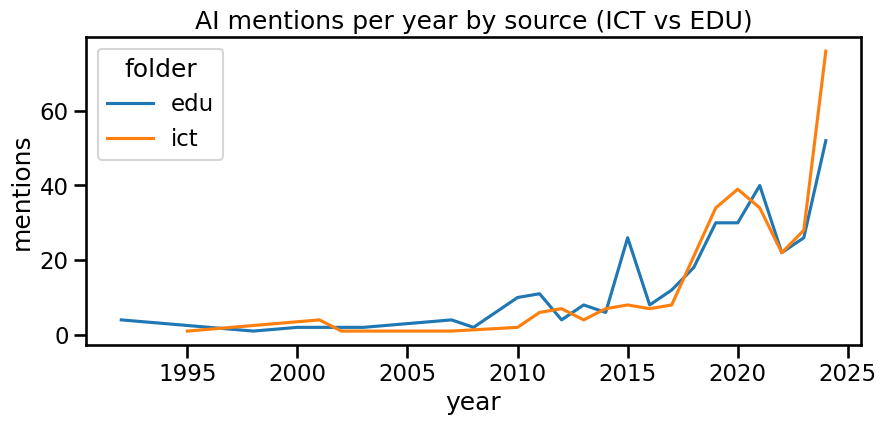

In [30]:
# Mentions per year
per_year = df.groupby('year').size().rename('mentions').reset_index()
per_year_folder = df.groupby(['year','folder']).size().rename('mentions').reset_index()
ax = per_year.plot(x='year', y='mentions', figsize=(10,4), title='AI mentions per year')
ax.set_xlabel('Year'); ax.set_ylabel('Mentions'); plt.show()
if sns is not None:
    plt.figure(figsize=(10,4))
    sns.lineplot(data=per_year_folder, x='year', y='mentions', hue='folder')
    plt.title('AI mentions per year by source (ICT vs EDU)')
    plt.show()


In [56]:
a = df.query("keyword == 'ai'")[['year','text']]
for x in a.itertuples():
    print(x.year, x.text)

2015 Erfahrung im Langstreckeneinsatz und auf «wide body aircraft»
2015 wide body aircraft
2019 AI
2020 AI
2021 Master universitaire en sciences humaines ou formation jugee equivalente complete par un Master en sante publique.
Specialisation en management, management des institutions de sante, en sante publique, en organisation et/ou en gestion de projet, maitrise de la langue anglaise.
Solide experience dans la direction d'une institution de sante et/ou sante publique. Experience en gestion d'equipes. Direction d'une structure publique ou privee pendant une periode d'au moins 5 ans
Vos avantages
Le DIP a pour mission, notamment, de donner a chaque eleve le moyen d'acquerir les meilleures connaissances et competences en vue de ses activites futures, et de chercher a susciter chez lui le desir d'apprendre et de se former, ceci en l'aidant a developper ses aptitudes et affermir son sens des responsabilites. En outre, le DIP veille au bien-etre, a la protection, a la sante et a la securit

keyword
ai                             87
ki                             80
robotik                        73
machine learning               56
data mining                    35
bildverarbeitung               34
robotics                       26
spracherkennung                22
artificial intelligence        19
künstliche intelligenz         18
ml                             14
advanced analytics             14
jax                            12
nlp                            11
deep learning                  10
tensorflow                     10
maschinelles lernen            10
predictive analytics            7
keras                           6
natural language processing     6
Name: count, dtype: int64


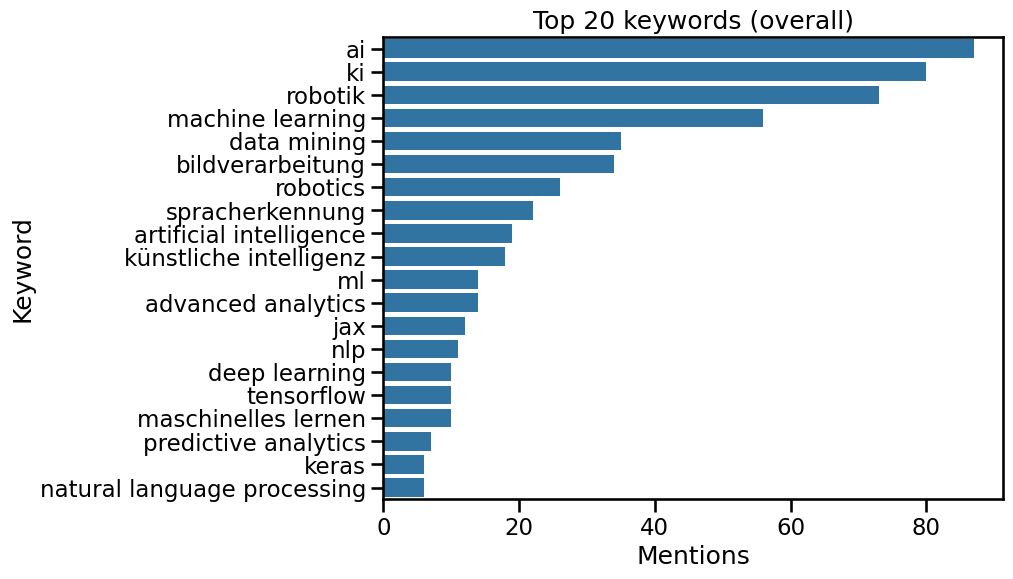

,folder,keyword,mentions
14,edu,ki,68
30,edu,robotik,44
1,edu,ai,30
17,edu,machine learning,24
9,edu,data mining,18
7,edu,bildverarbeitung,16
29,edu,robotics,14
0,edu,advanced analytics,8
20,edu,ml,8
12,edu,jax,7


In [32]:
# Top keywords overall and by source
top_kw = df['keyword'].value_counts().head(20)
print(top_kw)
if sns is not None:
    plt.figure(figsize=(8,6))
    sns.barplot(x=top_kw.values, y=top_kw.index, orient='h')
    plt.title('Top 20 keywords (overall)'); plt.xlabel('Mentions'); plt.ylabel('Keyword')
    plt.show()

top_by_src = (df.groupby(['folder','keyword']).size()
               .reset_index(name='mentions')
               .sort_values(['folder','mentions'], ascending=[True, False])
              )
top_by_src.head(20)


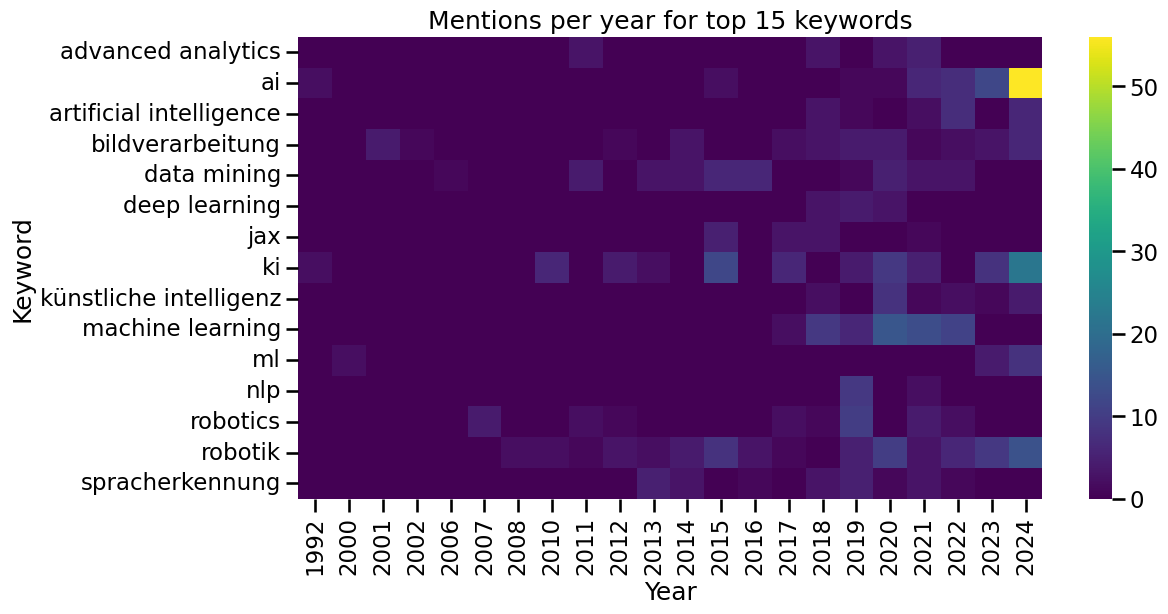

keyword,advanced analytics,ai,artificial intelligence,bildverarbeitung,data mining,deep learning,jax,ki,künstliche intelligenz,machine learning,ml,nlp,robotics,robotik,spracherkennung
year,,,,,,,,,,,,,,,
2020,3,1,0,4,5,3,0,9,8,15,0,0,0,10,1
2021,5,6,2,1,3,0,1,5,1,13,0,2,4,3,3
2022,0,7,7,2,3,0,0,0,2,11,0,0,2,6,1
2023,0,12,0,3,0,0,0,8,1,0,4,0,0,9,0
2024,0,56,6,6,0,0,0,22,4,0,8,0,0,14,0


In [33]:
# (Optional) heatmap for top N keywords across years
N = 15
topN = df['keyword'].value_counts().head(N).index
heat = (df[df['keyword'].isin(topN)]
        .groupby(['year','keyword']).size()
        .unstack(fill_value=0)
       )
if sns is not None and len(heat)>0:
    plt.figure(figsize=(12,6))
    sns.heatmap(heat.T, cmap='viridis')
    plt.title(f'Mentions per year for top {N} keywords')
    plt.xlabel('Year'); plt.ylabel('Keyword')
    plt.show()
heat.tail()
